In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

/opt/conda/lib/python3.8/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '2.7.1' or newer of 'numexpr' (version '2.7.0' currently installed).
  warnings.warn(msg, UserWarning)


In [11]:
csv_path = "/home/work/AGE/new_train.csv"
df = pd.read_csv(csv_path)
save_path = "/home/work/AGE/kde"

In [12]:
criterion_column = 'race'
target_columns = ['age']

In [13]:
def _no_criterion(df, target_columns):
    for t in target_columns:
        fig = plt.figure(figsize=(10,10))
        sns.kdeplot(df[t], bw='1', shade=True)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Density Plot of {t}')
        fig.savefig(os.path.join(save_path,f'kde_{t}.png'))
        plt.show()
        plt.clf()

def _criterion(df, criterion_column, target_columns):
    criterion = df[criterion_column].unique()
    target = target_columns

    for c in criterion:
        for t in target:
            fig = plt.figure(figsize=(10,10))
            c_df = df[df[criterion_column] == c]
            sns.kdeplot(c_df[t], bw='1', shade=True)
            plt.xlabel('Value')
            plt.ylabel('Density')
            plt.title(f'Density Plot of {c} {t}')
            fig.savefig(os.path.join(save_path,f'kde_{t}_{c}.png'))
            plt.show()
            plt.clf()

def drawKDE(df, criterion_column, target_columns):
    
    if criterion_column is None:
        _no_criterion(df,target_columns)
    else:
        _criterion(df, criterion_column, target_columns)

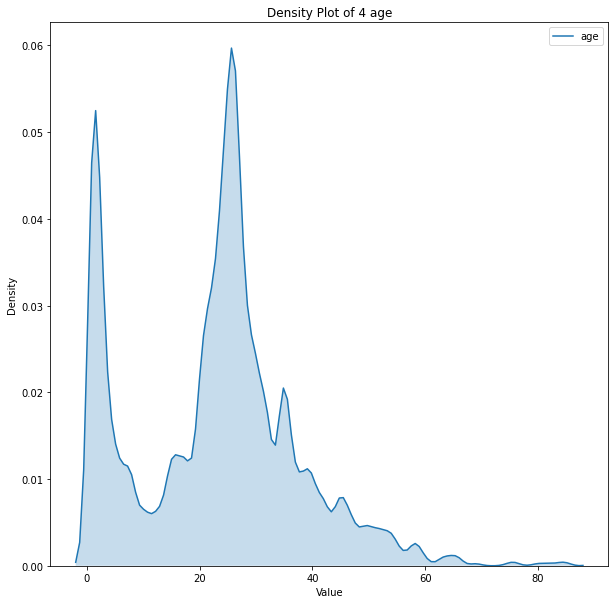

<Figure size 432x288 with 0 Axes>

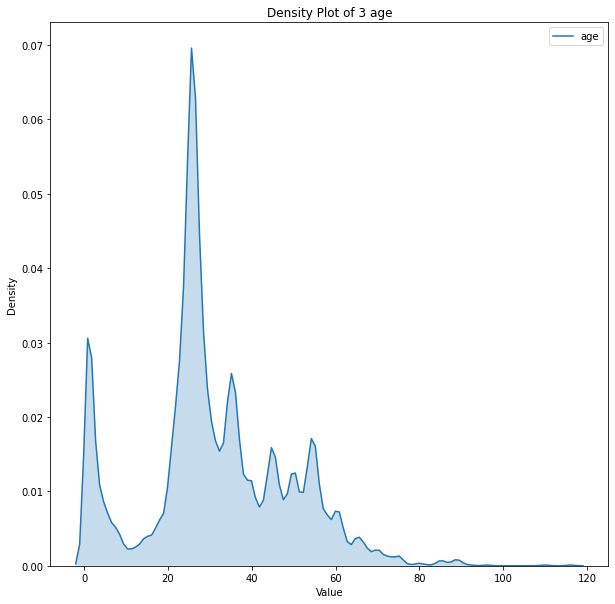

<Figure size 432x288 with 0 Axes>

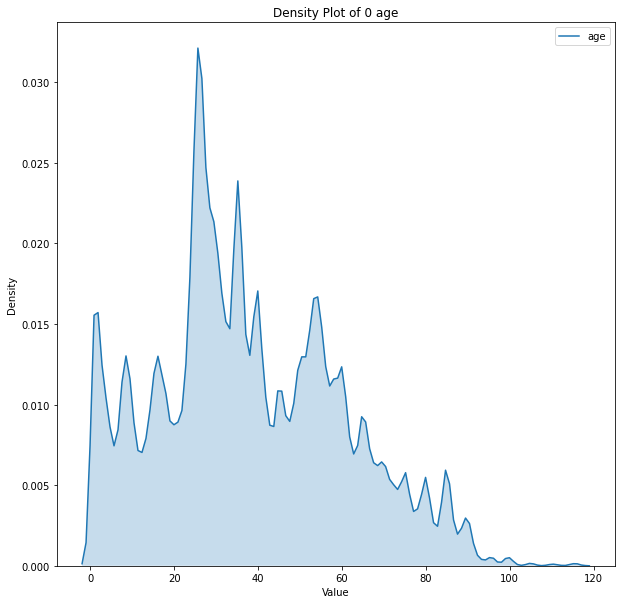

<Figure size 432x288 with 0 Axes>

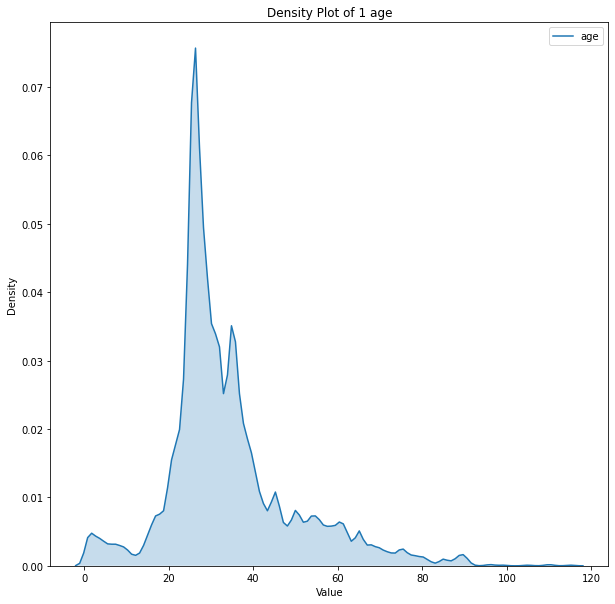

<Figure size 432x288 with 0 Axes>

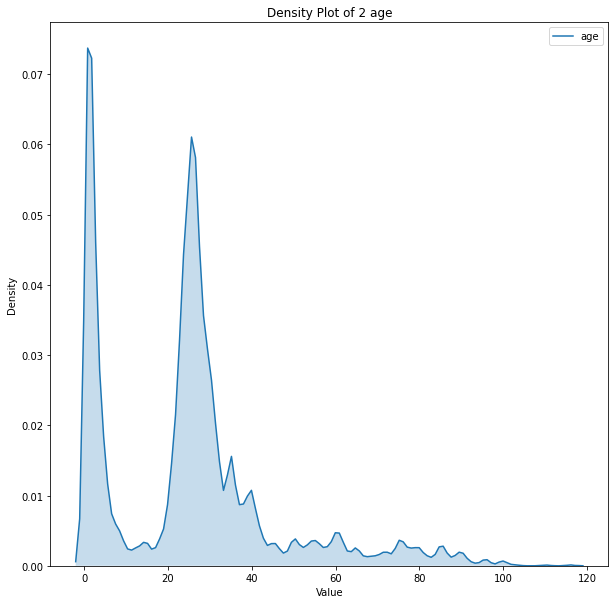

<Figure size 432x288 with 0 Axes>

In [14]:
if not os.path.exists(save_path):
    os.makedirs(save_path)
drawKDE(df, criterion_column, target_columns)